In [1]:
import random
import math
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.stats import binom
from scipy.special import comb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
serial_numbers_1=[331]
serial_numbers_2=[331,134, 306,  53, 272,  97, 100, 255,   3, 298]
serial_numbers_3=[111, 228, 139, 216,  36, 213, 189,  71, 184, 331, 49, 224, 173, 311,305, 208, 231, 285, 142,  22, 168, 263, 135, 149, 155]

# 2c: Unbiased Frequentist Estimator

Fill out the following function with the unbiased estimator of maximum number of tanks, $N$, that you have derived.

In [3]:
def frequentist_estimator(serial_numbers):
    """ Returns the frequentist estimator for N, the total number of tanks, 
    given a sample of k tanks with maximum serial number Y_k
    
    Parameters
    ----------
        serial_numbers : list of observed tank serial numbers
    
    Returns: estimate N_hat
    """
    y_k = max(serial_numbers)
    sample_size = len(serial_numbers)
    N_hat = y_k * (sample_size**(-1) + 1) - 1
    return N_hat

# 2e: Bayesian Posterior

Fill out the following functions with the posterior using the given uniform prior on $[100,1000]$. Then use this function to find the credible interval for $N$. The function $comb(n,k)$ returns $n$ choose $k$.

In [4]:
def uniform_prior(n,Nmin=100,Nmax=1000):
    """ Returns the probability mass function of a uniform distribution on the integers from Nmin, Nmax
    
    Parameters
    ----------
        n : the value at which the prior is being evaluated.
        Nmin : lower bound on support of prior 
        Nmax : upper bound on support of prior 
    """
    assert Nmax>Nmin
    if n<=Nmax and n>=Nmin:
        return 1.0/(Nmax-Nmin)
    else:
        return 0.0

In [5]:
def posterior_distribution_with_uniform_prior(n,serial_numbers,Nmin=100,Nmax=1000):
    """ Returns the frequentist estimator for N, the total number of tanks, 
    given a sample of k tanks with maximum serial number Y_k
    
    Parameters
    ----------
        n : value of N
        serial_numbers : list of observed tank serial numbers
        Nmin : lower bound on support of prior 
        Nmax : upper bound on support of prior 
    
    Returns: P(N=n |serial_numbers)
    """
    y_k = max(serial_numbers)
    k = len(serial_numbers)
    likelihood = 1
    for i in serial_numbers:
        likelihood = comb(i-1, k-1)/comb(n,k)    
    posterior = uniform_prior(n=n, Nmin=Nmin, Nmax=Nmax) * likelihood
    return posterior


In [6]:
def plot_posteriors(serial_numbers,Nmin=100,Nmax=1000):
    """ Plots the uniform prior and the posterior P(N |Y_k)
    
    Parameters
    ----------
    serial_numbers : list of observed tank serial numbers
    Nmin: lower bound on support of prior 
    Nmax: upper bound on support of prior 
    """
    
    support=np.arange(Nmin-10,Nmax+10)
    uniform=[]
    posterior=[]
    for i in support:
        uniform.append(uniform_prior(i,Nmin,Nmax)) 
        posterior.append(posterior_distribution_with_uniform_prior(i,serial_numbers,Nmin,Nmax))
        

    plt.plot([0, 1], [0, 0], color='white', lw=1)
    plt.stem(support, uniform, linefmt='darkblue', label='Uniform prior')
    plt.stem(support, posterior, linefmt='green', lw=1, label='Posterior - w/uniform prior')
    plt.legend()
    return


In [7]:
def credible_interval(alpha,serial_numbers,Nmin=100,Nmax=1000):
    """ returns the credible interval at the level alpha
    
    Parameters
    ----------
    alpha: amount of probability mass encompassed by credible interval
    serial_numbers : list of observed tank serial numbers
    Nmin : lower bound on support of prior 
    Nmax : upper bound on support of prior 
    
    Returns: a list with the cutoffs for the credible intervals for N in the form
                interval=[lower,upper]
        
    """
    y_k = max(serial_numbers)
    k = len(serial_numbers)
    return [y_k/(1-alpha)**(1/k), y_k/(alpha**(1/k))]



In [8]:
def plot_frequentist_estimate_and_credible_int(alpha,serial_numbers,Nmin=100,Nmax=1000):
    """ plots the posterior P(N| Y_k), the credible interval, and the frequentist estimate of N.
    
    Parameters
    ----------
    alpha : amount of probability mass encompassed by credible interval
    serial_numbers : list of observed tank serial numbers
    Nmin : lower bound on support of prior 
    Nmax : upper bound on support of prior 
    
    """
    
    #potential support of N
    support=np.arange(Nmin,Nmax)
    
    #potential support of N
    posterior=[]
    low_interval_probs=[]
    low_interval=[]
    upper_interval_probs=[]
    upper_interval=[]
    
    #gets credible_interval
    left_end, right_end=credible_interval(alpha,serial_numbers,Nmin,Nmax)
    
    #gets frequentist estimate
    frequentist_estimate=frequentist_estimator(serial_numbers)
    
    #print out information
    print("Credible Interval: "+str(left_end)+'-'+str(right_end))
    print("Frequentist Estimate: "+str(int(frequentist_estimate)))
    
    #keeps track of which elements in the support are in which intervals
    for i in support:
        prob=posterior_distribution_with_uniform_prior(i,serial_numbers,Nmin,Nmax)
        posterior.append(prob)
        if i<=left_end:
            low_interval_probs.append(prob)
            low_interval.append(i)
        if i>=right_end:
            upper_interval_probs.append(prob)
            upper_interval.append(i)
            
    #plot posterior
    plt.stem(support, posterior, linefmt='lightgreen',markerfmt='go',basefmt='None',label='Posterior - w/uniform prior')

    
    #plot credible interval
    plt.plot([left_end, right_end], [0, 0], color='darkblue', lw=5, label='Credible Interval')
    
    #plot the lower interval
    if len(low_interval)>0:
        markerline, stemlines, baseline = plt.stem(low_interval,low_interval_probs,markerfmt='o',linefmt='darkorange',  basefmt='None')
        markerline.set_markerfacecolor('darkorange')
        markerline.set_markersize(8)
        markerline.set_color('darkorange')
    
    #plot the higher interval
    if len(upper_interval)>0:
        markerline, stemlines, baseline=plt.stem(upper_interval, upper_interval_probs,markerfmt='o',linefmt='darkorange', basefmt='None')
        markerline.set_markerfacecolor('darkorange')
        markerline.set_markersize(8)
        markerline.set_color('darkorange')

    #plot the frequentist estimate
    plt.plot([frequentist_estimate,frequentist_estimate], [0,max(posterior)] ,'o-',color='red', lw=3, label='Frequentist Estimate')

    #Axes labels
    plt.title('Each Orange Area = '+str(alpha*50.0)+'%', fontsize=15)
    plt.xlabel('N')
    plt.ylabel('P(N|Y_k)')
    plt.legend(bbox_to_anchor=[1.0,1.0])
    return

Credible Interval: 339.4871794871795-13240.0
Frequentist Estimate: 661


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


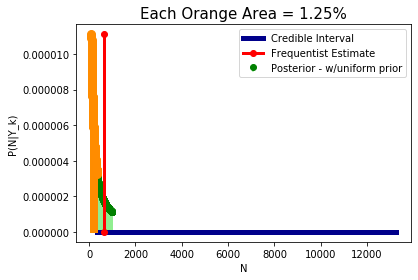

In [9]:
plot_frequentist_estimate_and_credible_int(alpha=0.025,serial_numbers=serial_numbers_1,Nmin=100,Nmax=1000)